## **Introduction**

#### Overview

#### Analytical Questions
1. What are the different customer segments based on usage patterns such as tenure, PhoneService, MultipleLine, Internet Service, Online Security, OnlineBackup, DeviceProtection, TechSupport, Streaming TV, Streaming Movies, and Contract type?
2. What are the different customer segments based on demographic factors such as gender, SeniorCitizen status, Partner status, and Dependents?
3. What are the different customer segments based on payment information such as Paperless Billing, Payment Method, Monthly Charges, and TotalCharges?

#### **Null Hypothesis:** There seems to be no relation between total charges and churn
#### **Alternate Hypothesis:** There is a strong relationship between total charges and churn

## **Importations**

In [2]:
import pyodbc 
from dotenv import dotenv_values 
import re
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

##  **Business Understanding**
1. Load data
2. Check for missing values
3. Check for uniques values
4. Find out the data structure and format
5. Checking for Duplicates

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
environment_variables = dotenv_values('.env')
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection"

In [5]:
connection = pyodbc.connect(connection_string)

In [6]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
 
# Read data from the SQL query result
data_1 = pd.read_sql(query, connection)

 # Display the first few rows of the DataFrame
data_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
data2 = pd.read_csv('D:/Angie/azubi/Career roller/LP2_CLASSIFICATION-PROJECT/LP2_Telco-churn-second-2000.csv')

In [8]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [9]:
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [11]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


Comment: 
1. Total Charges has got to be changed to float from object data type
2. Senior Citizen has got to change from numbers to yes and no values

In [12]:
data2.describe(include='object').T

,count,unique,top,freq
customerID,2043,2043,5600-PDUJF,1
gender,2043,2,Male,1022
Partner,2043,2,No,1047
Dependents,2043,2,No,1412
PhoneService,2043,2,Yes,1823
MultipleLines,2043,3,No,987
InternetService,2043,3,Fiber optic,905
OnlineSecurity,2043,3,No,1029
OnlineBackup,2043,3,No,911
DeviceProtection,2043,3,No,923


Comment:
1. The yes and nos to be converted to true and false and the data types changed

In [13]:
data2.duplicated().sum()

0

In [14]:
# Display unique values in each column
for column in data2.columns:
    print(f"Column: {column}, Unique Values: {data2[column].unique()}")

Column: customerID, Unique Values: ['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender, Unique Values: ['Male' 'Female']
Column: SeniorCitizen, Unique Values: [0 1]
Column: Partner, Unique Values: ['No' 'Yes']
Column: Dependents, Unique Values: ['No' 'Yes']
Column: tenure, Unique Values: [ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
Column: PhoneService, Unique Values: ['Yes' 'No']
Column: MultipleLines, Unique Values: ['No' 'No phone service' 'Yes']
Column: InternetService, Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity, Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup, Unique Values: ['No' 'Yes' 'No internet service']
Column: DeviceProtection, Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSupport, Unique Va

In [15]:
data_1.describe(include='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [16]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [17]:
data_1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [18]:
# Display unique values in each column for data 1
for column in data_1.columns:
    print(f"Column: {column}, Unique Values: {data_1[column].unique()}")

Column: customerID, Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
Column: gender, Unique Values: ['Female' 'Male']
Column: SeniorCitizen, Unique Values: [False  True]
Column: Partner, Unique Values: [ True False]
Column: Dependents, Unique Values: [False  True]
Column: tenure, Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService, Unique Values: [False  True]
Column: MultipleLines, Unique Values: [None False True]
Column: InternetService, Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity, Unique Values: [False True None]
Column: OnlineBackup, Unique Values: [True False None]
Column: DeviceProtection, Unique Values: [False True None]
Column: TechSupport, Unique Values: [False True None]
Column: StreamingTV, U

In [19]:
data_1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [20]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [21]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [22]:
data_1.describe(include='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [23]:
#converting the columns containing True and False to boolean data type
cols = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
data_1[cols] = data_1[cols].astype(bool)

In [24]:
data_1.describe(include='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
InternetService,3000,3,Fiber optic,1343
Contract,3000,3,Month-to-month,1641
PaymentMethod,3000,4,Electronic check,1004


In [25]:
data_1.duplicated().sum()

0

In [26]:
data2.shape

(2043, 21)

In [27]:
data_1.shape

(3000, 21)

## **Data Processing**
1. Handle missing values
2. Clean Data
3. Data Transformation
4. Convert Data types
5. Handle text data
6. Save processed data

In [28]:
#stripping the quotes from the TotalCharges column
data2['TotalCharges'] = data2['TotalCharges'].apply(lambda x: pd.to_numeric(x.strip("'"), errors='coerce'))

In [29]:
#converting the Total Charges column to float
data2['TotalCharges'] = data2['TotalCharges'].astype(float)

In [30]:
#dropping the missing values in the TotalCharges column for data_1
data_1.dropna(subset=['TotalCharges'], inplace=True)

the 651 missing values make 21% of the missing data therefore it is risky to delete these rows as a lot of information will be lost hence, the missing values shall be replaced with unknown

In [31]:

# Replace missing values with "unknown"
data_1.fillna("unknown", inplace=True)

In [32]:
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
#converting the SeniorCitizen datatype to boolean
data2['SeniorCitizen'] = data2['SeniorCitizen'].astype(bool)

# Replacing 0 with false and 1 with True
data2['SeniorCitizen'] = data2['SeniorCitizen'].replace({0: False, 1: True})

In [34]:
#list out the columns to transform
yes_no_columns = ['Partner', 'Dependents', 'PhoneService','MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

data2[yes_no_columns] = data2[yes_no_columns].astype(bool)
# Replace 'yes' with True and 'no' with False for the specified columns
data2[yes_no_columns] = data2[yes_no_columns].replace({'Yes': True, 'No': False})

In [35]:
#combining the two datasets
all_data = pd.concat([data_1, data2], ignore_index=True)
# save concatenated data to CSV
all_data.to_csv('all_data.csv', index=False)

In [36]:
all_data.shape

(5038, 21)

In [37]:
# Display unique values in each column for data 1
for column in all_data.columns:
    print(f"Column: {column}, Unique Values: {all_data[column].unique()}")

Column: customerID, Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender, Unique Values: ['Female' 'Male']
Column: SeniorCitizen, Unique Values: [False  True]
Column: Partner, Unique Values: [ True False]
Column: Dependents, Unique Values: [False  True]
Column: tenure, Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39
  0]
Column: PhoneService, Unique Values: [False  True]
Column: MultipleLines, Unique Values: [False  True]
Column: InternetService, Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity, Unique Values: [False  True]
Column: OnlineBackup, Unique Values: [ True False]
Column: DeviceProtection, Unique Values: [False  True]
Column: TechSupport, Unique Values: [False  True]
Column: StreamingTV, Unique Values: [False  True]


## **Data Evaluation**
1. Descriptive stats
2. Correlation analysis
3. Distribution analysis
4. Addressing outliers
5. Check for data imbalances

In [38]:
print(all_data.describe().T)

                 count         mean          std        min         25%  \
tenure          5038.0    32.608972    24.520486   0.000000    9.000000   
MonthlyCharges  5038.0    65.108079    30.069695  18.400000   35.799999   
TotalCharges    5035.0  2302.062861  2269.483576  18.799999  417.675003   

                        50%          75%          max  
tenure            29.000000    56.000000    72.000000  
MonthlyCharges    70.599998    90.050003   118.650002  
TotalCharges    1401.150024  3862.000000  8670.100000  


Description
1. Tenure:
The mean tenure is approximately 32.61 months, with a standard deviation of 24.52.
The minimum tenure is 0 months, and the maximum is 72 months.
The majority of customers (25% to 75%) have a tenure between 9 and 56 months.

2. Monthly Charges:
The mean monthly charge is around 65.11, with a standard deviation of 30.07.
Monthly charges range from a minimum of 18.40 to a maximum of 118.65.
The middle 50% of customers (25% to 75%) have monthly charges between 35.80 and 90.05.

3. Total Charges:
The mean total charge is approximately 2302.06, with a standard deviation of 2269.48.
Total charges range from a minimum of 18.80 to a maximum of 8670.10.
The middle 50% of customers have total charges between 417.68 and 3862.00.

In [39]:
print(all_data.describe(include=('object', 'bool')).T)

                 count unique               top  freq
customerID        5038   5038        7590-VHVEG     1
gender            5038      2              Male  2557
SeniorCitizen     5038      2             False  4219
Partner           5038      2              True  3501
Dependents        5038      2              True  2968
PhoneService      5038      2              True  4771
MultipleLines     5038      2              True  3336
InternetService   5038      3       Fiber optic  2248
OnlineSecurity    5038      2              True  2911
OnlineBackup      5038      2              True  3070
DeviceProtection  5038      2              True  3093
TechSupport       5038      2              True  2914
StreamingTV       5038      2              True  3199
StreamingMovies   5038      2              True  3241
Contract          5038      3    Month-to-month  2744
PaperlessBilling  5038      2              True  3818
PaymentMethod     5038      4  Electronic check  1700
Churn             5038      

### **Univariate Analysis**

Numeric data

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

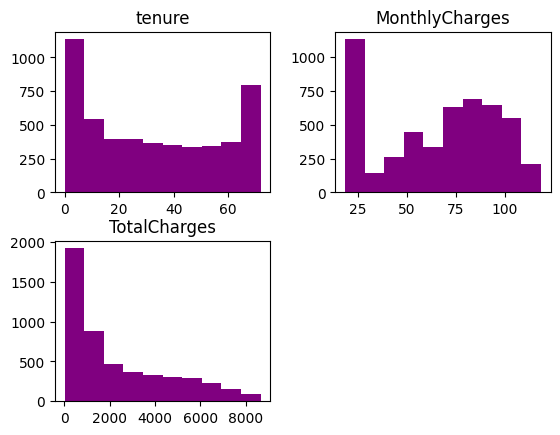

In [40]:
all_data.hist(grid=False, color='purple')

Description:
1. Tenure, MonthlyCharges and TotalCharges plots all show that the distribution of the data is not normally ditributed.

Categorical Data

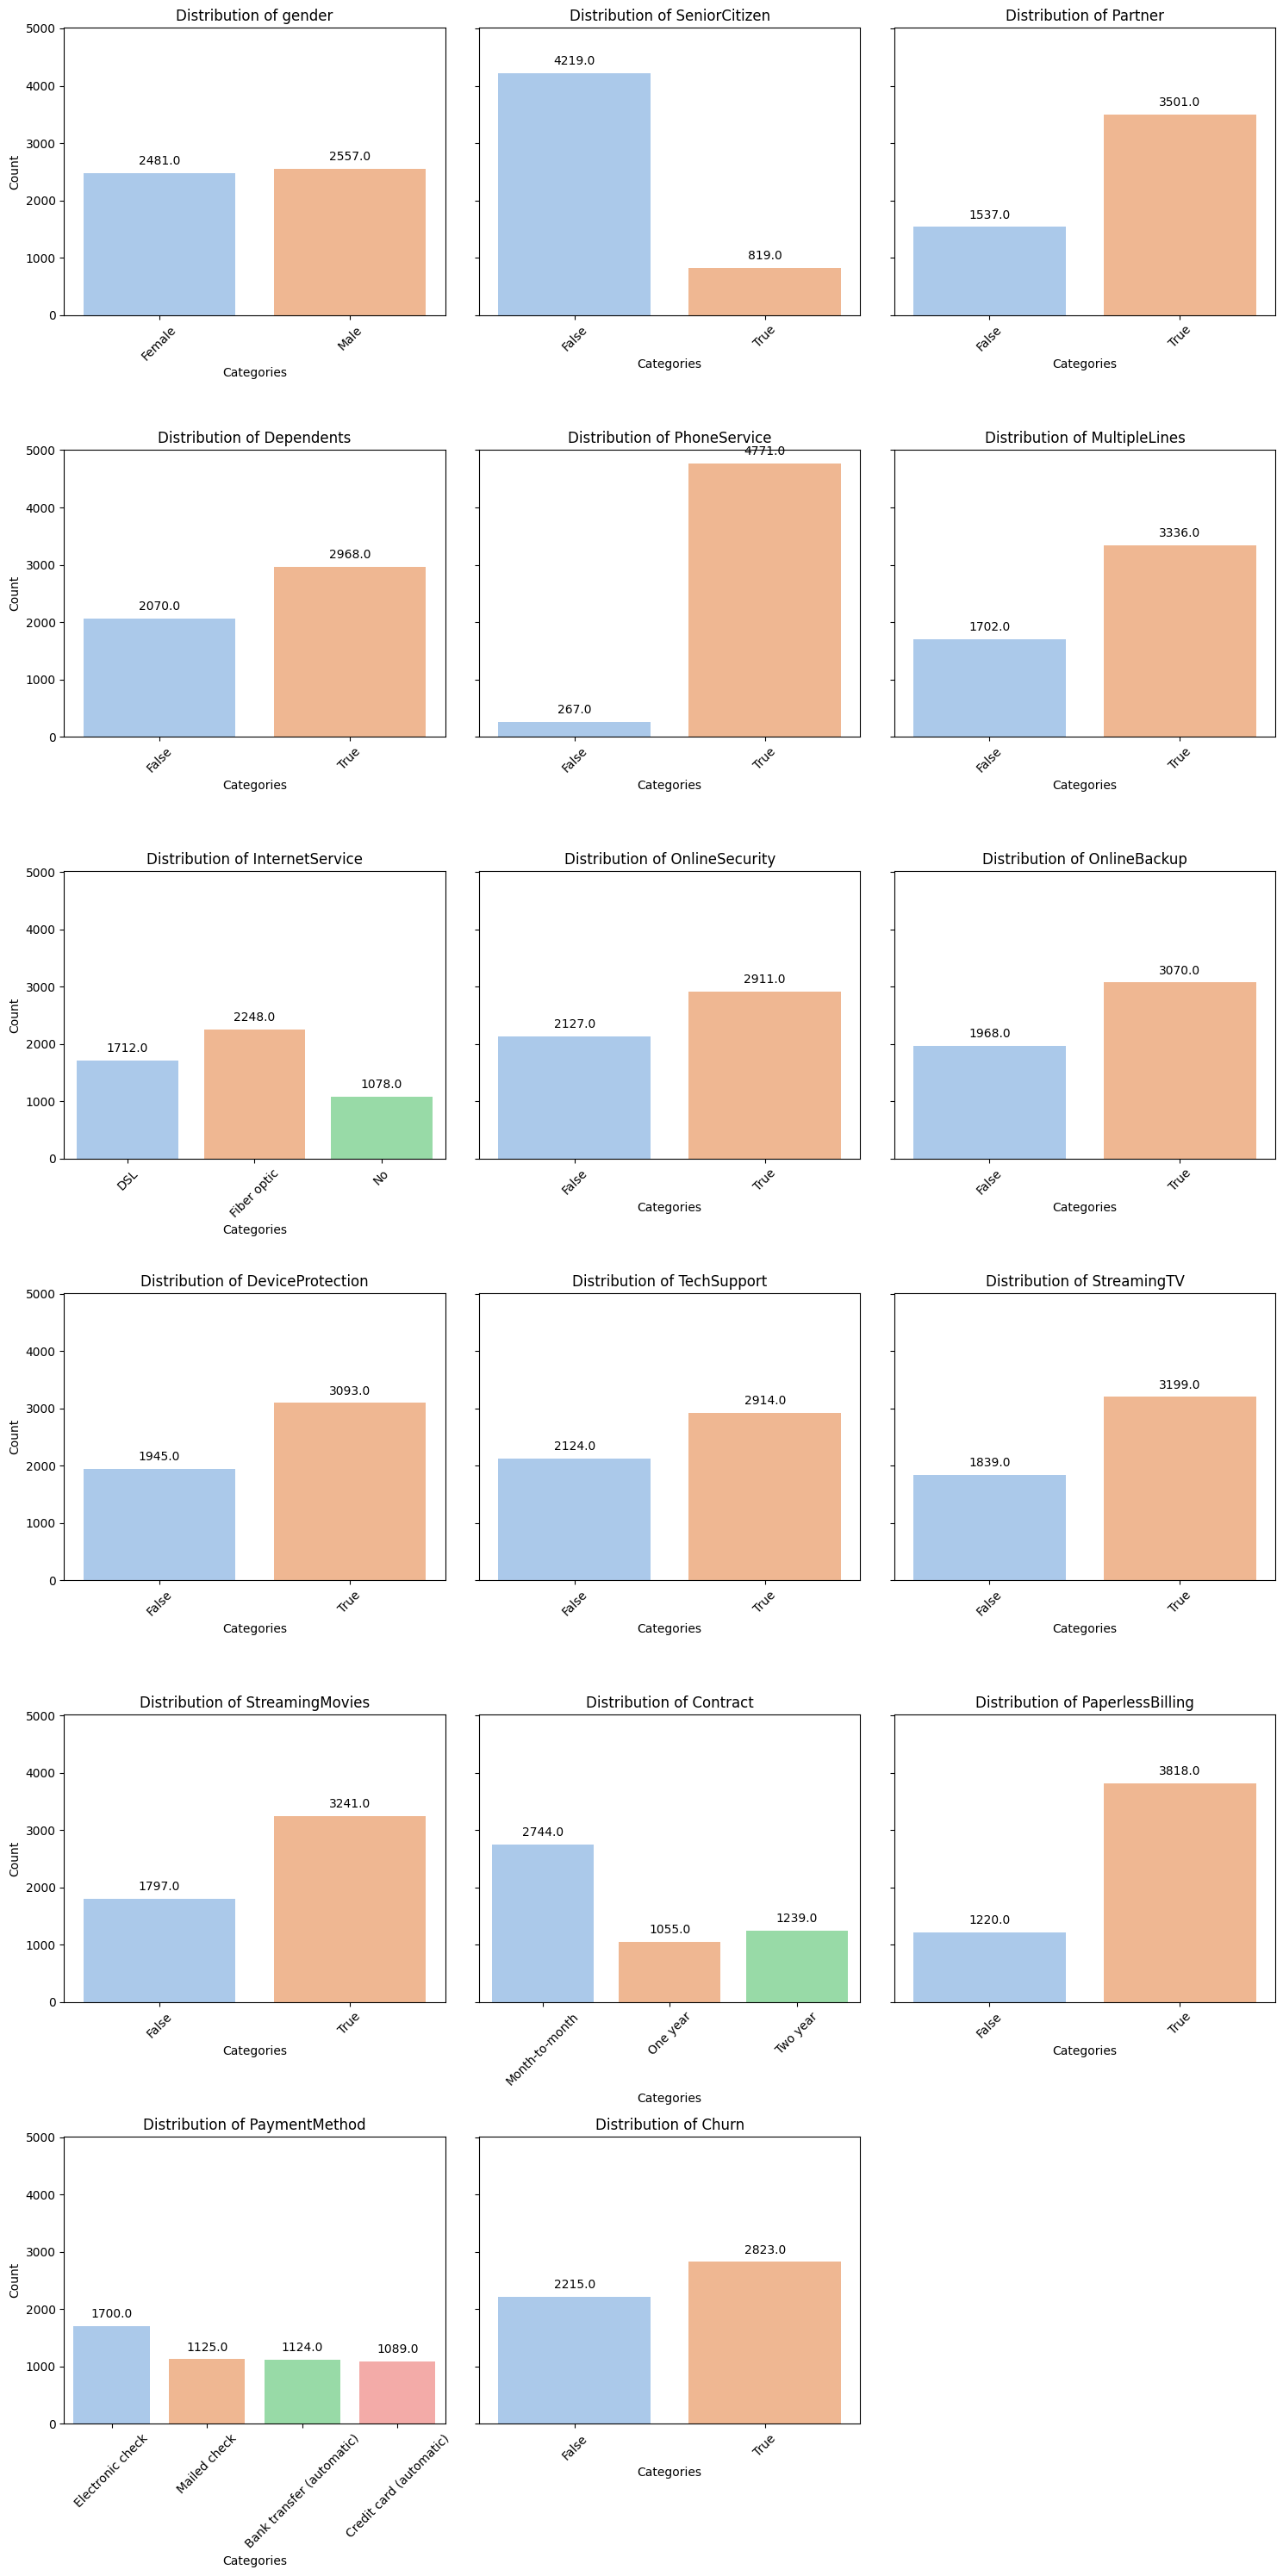

In [41]:
import math

categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Calculate the number of rows and columns based on the number of variables
num_vars = len(categorical_vars)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

# Set up subplots with adjusted width_ratios
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows), sharey=True)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Custom colors for bars
bar_colors = sns.color_palette("pastel")

# Plot grouped bar charts for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=all_data, ax=axes[i], palette=bar_colors)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    
    # Add labels to each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### **Multivariate Analysis**

Correlation Matrix

In [42]:
corr= all_data.corr(numeric_only=True)
corr

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.011522,-0.100040,0.004021,0.015380,0.074711,-0.015494,0.048435,0.055458,-0.012760,0.081522,0.074265,0.113433,0.221638,0.095212,0.083544
Partner,0.011522,1.000000,0.666341,0.250533,0.120350,0.413571,0.475762,0.444085,0.441512,0.449590,0.417226,0.410163,0.260431,0.053438,0.211622,0.318962
Dependents,-0.100040,0.666341,1.000000,0.106210,0.126593,0.393818,0.534265,0.463396,0.457306,0.514949,0.437767,0.414924,0.253081,-0.063168,0.054209,0.420156
tenure,0.004021,0.250533,0.106210,1.000000,0.009236,0.211075,0.180274,0.211871,0.207387,0.174688,0.160875,0.160476,0.003590,0.240173,0.826264,-0.184362
PhoneService,0.015380,0.120350,0.126593,0.009236,1.000000,0.331195,0.072248,0.084810,0.094490,0.072547,0.115092,0.086496,0.102054,0.180696,0.083649,0.151037
MultipleLines,0.074711,0.413571,0.393818,0.211075,0.331195,1.000000,0.471094,0.516227,0.502483,0.479694,0.531499,0.521203,0.389745,0.292489,0.294428,0.453791
OnlineSecurity,-0.015494,0.475762,0.534265,0.180274,0.072248,0.471094,1.000000,0.617884,0.616495,0.677319,0.547252,0.552304,0.340466,0.158500,0.229064,0.433862
OnlineBackup,0.048435,0.444085,0.463396,0.211871,0.084810,0.516227,0.617884,1.000000,0.605200,0.615671,0.571780,0.558023,0.403074,0.245929,0.300198,0.440774
DeviceProtection,0.055458,0.441512,0.457306,0.207387,0.094490,0.502483,0.616495,0.605200,1.000000,0.644815,0.631777,0.637699,0.379737,0.280963,0.306689,0.443456
TechSupport,-0.012760,0.449590,0.514949,0.174688,0.072547,0.479694,0.677319,0.615671,0.644815,1.000000,0.595026,0.591907,0.358102,0.180409,0.234230,0.422055


Heatmap for correlation

<Axes: >

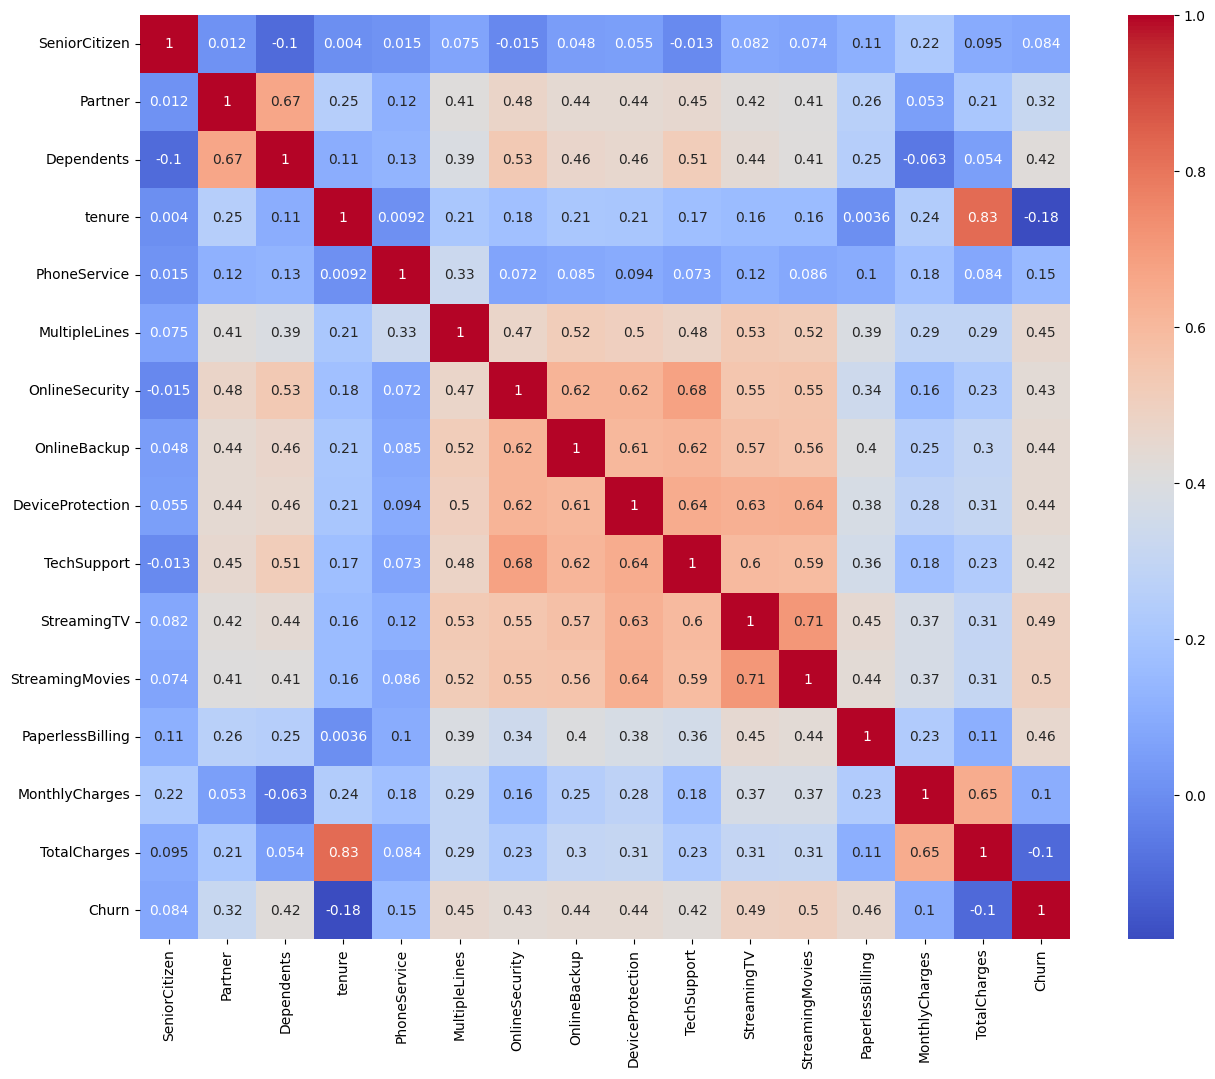

In [43]:
plt.figure(figsize= (15,12))
sns.heatmap(data=corr, annot=True,cmap='coolwarm')

In [44]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import plotly.express as px

In [46]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
all_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### **Analytical Questions**


Categorical Variables relation to churn

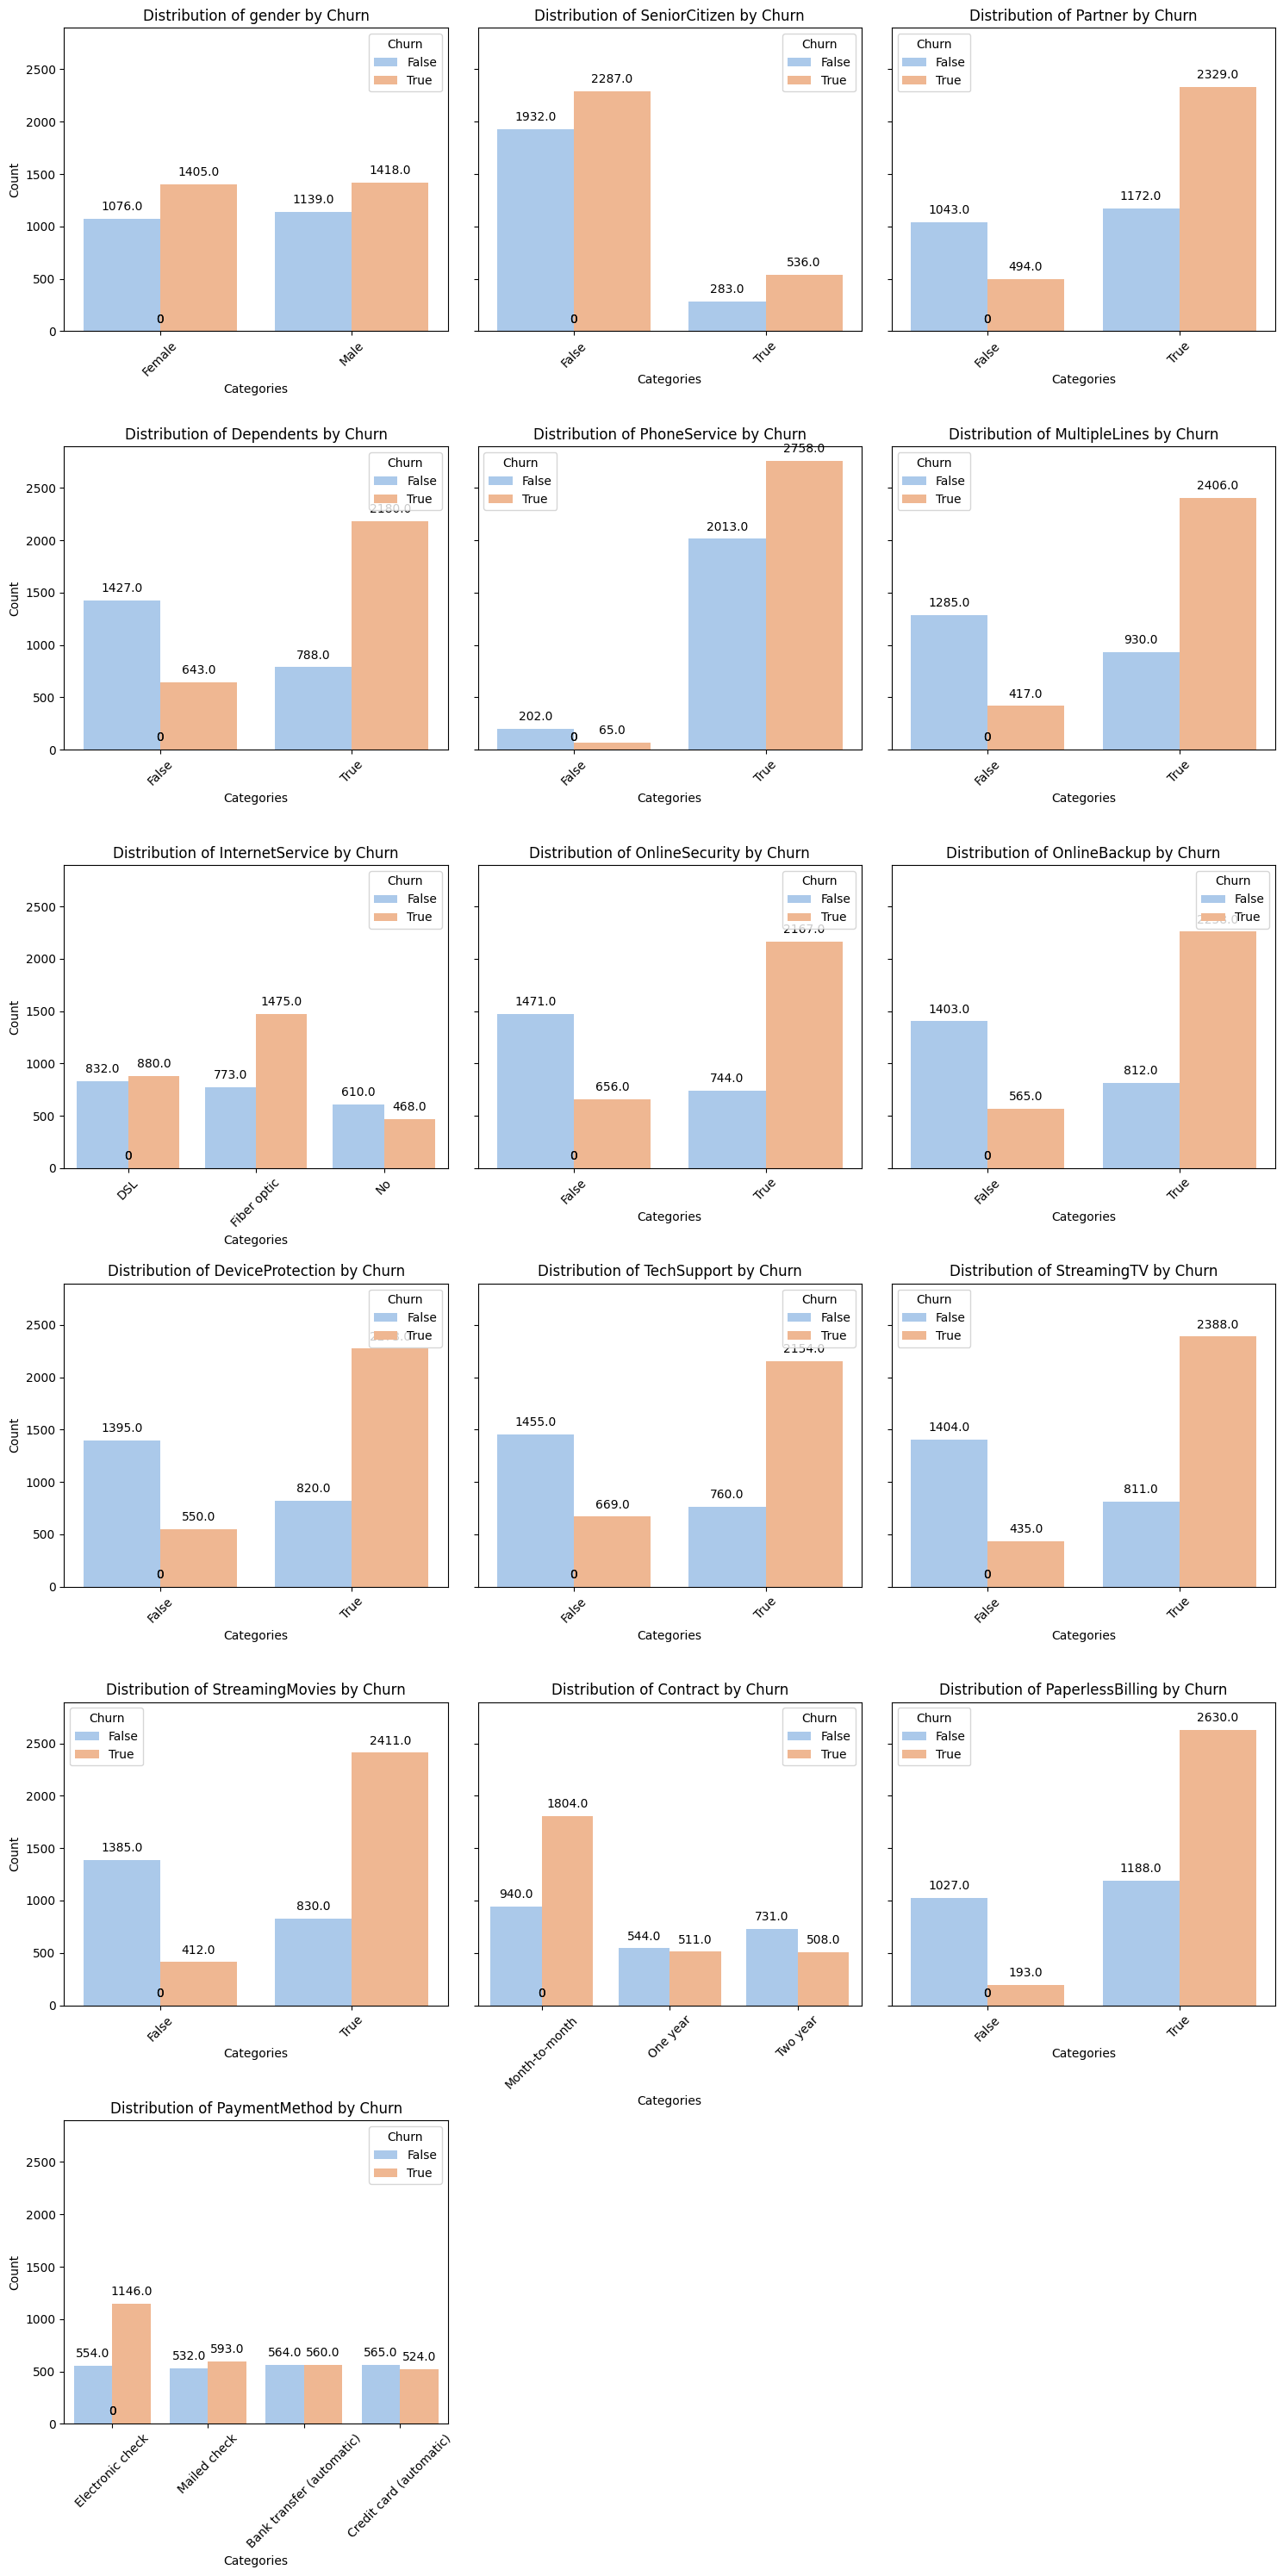

In [48]:
import math

categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate the number of rows and columns based on the number of variables
num_vars = len(categorical_vars)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

# Set up subplots with adjusted width_ratios
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows), sharey=True)

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Custom colors for bars
bar_colors = sns.color_palette("pastel")

# Plot grouped bar charts for each categorical variable with 'Churn' as hue
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='Churn', data=all_data, ax=axes[i], palette=bar_colors)
    axes[i].set_title(f'Distribution of {var} by Churn')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    
    # Add labels to each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Numeric value anaysis with churn

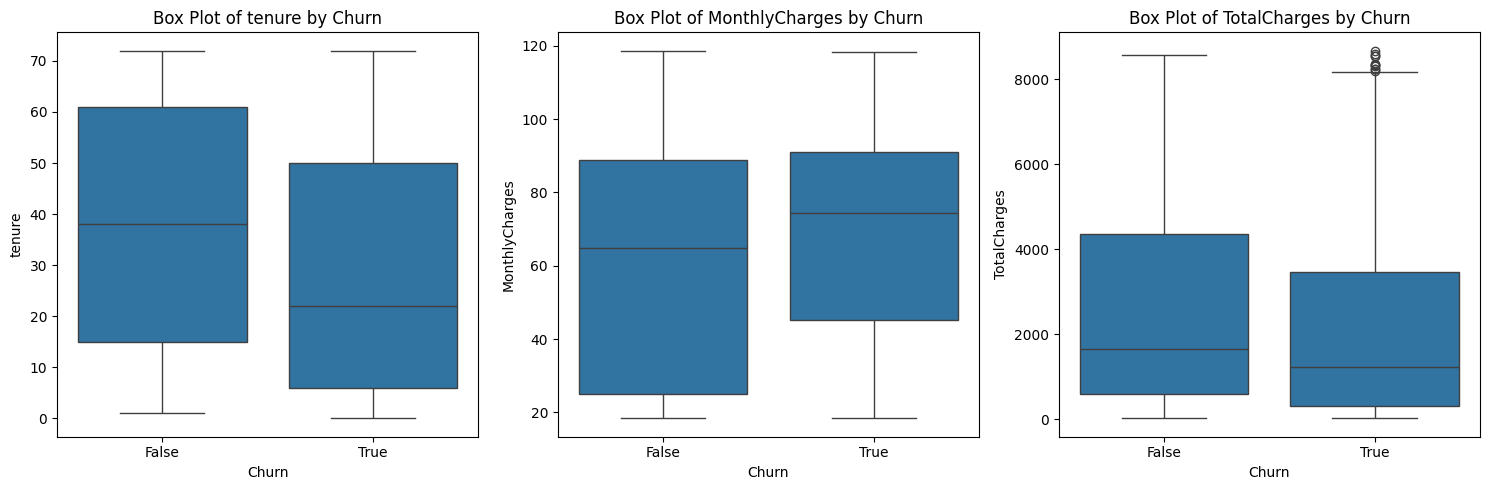

In [49]:
# List of columns you want to analyze
columns_to_analyze = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_analyze), figsize=(15, 5))

# Create box plots for each column
for i, column in enumerate(columns_to_analyze):
    sns.boxplot(x='Churn', y=column, data=all_data, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


Description:
1. **Tenure:**
The box plot shows that there is variability in both the customers that chrned and those that did not churn with respect to tenure. The customers that did not churn have a higher median tenure as compared to those that churned.
2. **Monthly Charges:**
The bocx plot shows that there is high variability in non-churned customers and hardly in the churned ones. It also indicates that the median for those that churned is higher than those that did not churn. There exists outliers in both datasets.
3. **Total Charges:**
The box plot indicates that there is hardly any variability in total charges for churned and non-churned customers. The medians for both categories are on the low end but the one for churned customers is lower. Both categories have a high number of outliers due to the length of whiskers.

In [50]:
import plotly.figure_factory as ff

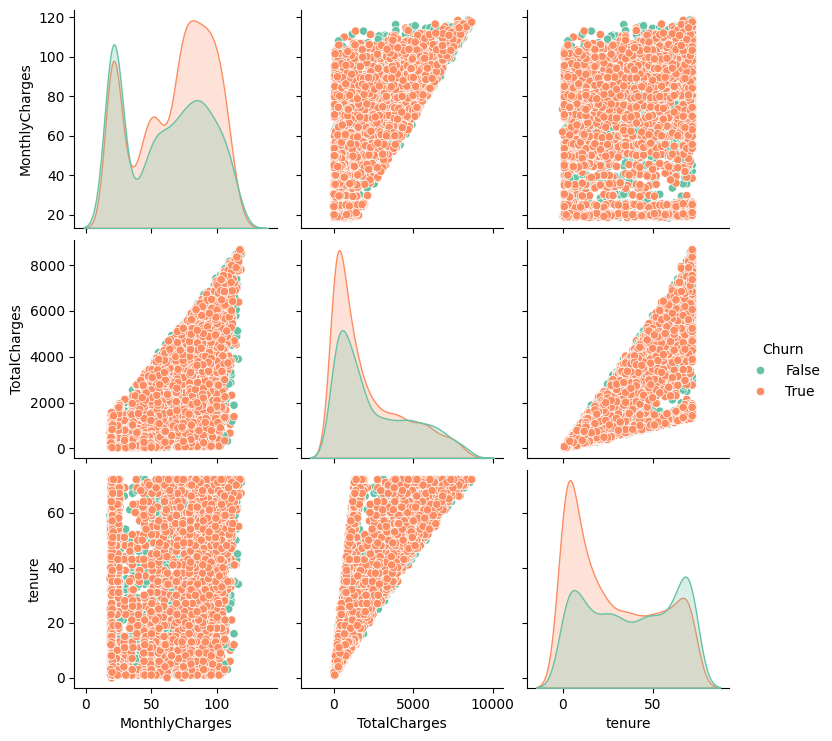

In [51]:
# Create pairplots for multiple scatterplots
dataa = all_data[['MonthlyCharges','TotalCharges','Churn','tenure']]
sns.pairplot(dataa, hue='Churn', palette='Set2')

plt.show()